In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
imagesize = 256
channels = 3

train_data = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range=10


)

train_generator = train_data.flow_from_directory(
    'datasets/train',
    target_size = (imagesize,imagesize),
    batch_size=32,
    class_mode = 'sparse',


)



Found 1842 images belonging to 4 classes.


In [4]:
validation_data = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range=10


)

validation_generator = validation_data.flow_from_directory(
    'datasets/val',
    target_size = (imagesize,imagesize),
    batch_size=32,
    class_mode = 'sparse',
)

Found 230 images belonging to 4 classes.


In [5]:
test_data = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range=10


)
test_generator = test_data.flow_from_directory(
    'datasets/test',
    target_size = (imagesize,imagesize),
    batch_size=32,
    class_mode = 'sparse',

)


Found 232 images belonging to 4 classes.


In [6]:
print(train_generator.class_indices)
class_names = list(train_generator.class_indices.keys())


{'Potato Early Blight': 0, 'Potato Healthy': 1, 'Potato Late Blight': 2, 'Unknown': 3}


In [15]:
input_shape = (imagesize, imagesize, channels)
n_classes = 4

model = models.Sequential([
    layers.InputLayer(input_shape = input_shape),
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64 , activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'), # activation  softmax is normalize the activation of the classes
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 64)      

In [17]:
model.compile(
    optimizer = 'adam',  # adam is a famouse optimizer in deep learning
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
    )

In [18]:
230/32


7.1875

In [19]:
history = model.fit( # records every history of epochs
    train_generator,
    steps_per_epoch=57,
    batch_size = 32,
    validation_data = validation_generator,
    validation_steps=7,
    verbose = 1,
    epochs = 20,
    
) # training the model , vali

Epoch 1/20
 5/57 [=>............................] - ETA: 2:24 - loss: 1.2209 - accuracy: 0.4125

KeyboardInterrupt: 

In [19]:
score = model.evaluate(test_generator)
score

7/7 [==============================] - 4s 518ms/step - loss: 0.0824 - accuracy: 0.9769


[0.08240257948637009, 0.9768518805503845]

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, ' Training  and Validation Accuracy')

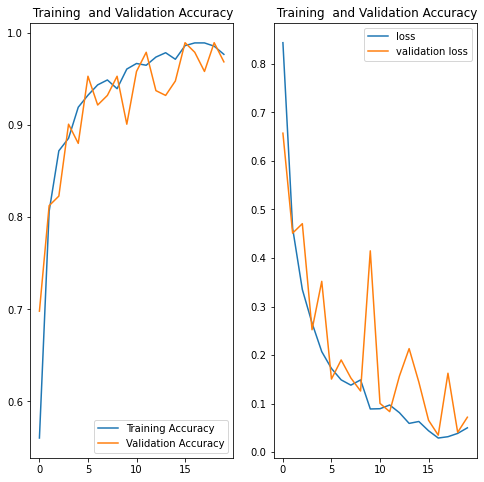

In [23]:
epochs = 20
plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc , label ='Training Accuracy')
plt.plot(range(epochs), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title(' Training  and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss , label ='loss')
plt.plot(range(epochs), val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title(' Training  and Validation Accuracy')

first image to predict
actual label: Potato___Late_blight
predicted label: Potato___Late_blight


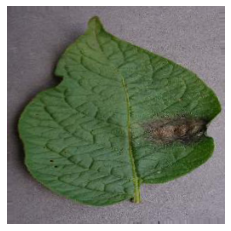

In [27]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    plt.axis('off')
    
    break


In [28]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

AttributeError: 'NoneType' object has no attribute 'predict'

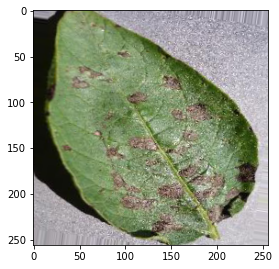

In [128]:
plt.figure(figsize=(25, 25))
for images, labels in test_generator:
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

NameError: name 'model' is not defined